In [12]:
library(tidyverse)
library(MLmetrics)

In [13]:
pandas = read_tsv("~/RIDIR/Datasets/AreaInterpolateValidation/geopandas_intensive2000.tsv", col_names = c("TID", "pandas")) %>%
    arrange(desc(pandas))
head(pandas)
nrow(pandas)

Parsed with column specification:
cols(
  TID = col_character(),
  pandas = col_double()
)


TID,pandas
T42101000324,38.12638
T42101000159,21.81991
T42101000160,21.62135
T42101000330,20.78395
T42101000229,20.62140
T42101000184,20.56308


[1] 367

In [14]:
spark = read_tsv("~/RIDIR/Datasets/AreaInterpolateValidation/geospark_intensive2000.tsv", col_names = c("TID", "spark")) %>%
    arrange(desc(spark))
head(spark)
nrow(spark)

Parsed with column specification:
cols(
  TID = col_character(),
  spark = col_double()
)


TID,spark
T42101000324,38.12638
T42101000159,21.81991
T42101000160,21.62135
T42101000330,20.78395
T42101000229,20.62140
T42101000184,20.56308


[1] 367

In [15]:
table = pandas %>% left_join(spark, by = c("TID"))
head(table)
nrow(table)

TID,pandas,spark
T42101000324,38.12638,38.12638
T42101000159,21.81991,21.81991
T42101000160,21.62135,21.62135
T42101000330,20.78395,20.78395
T42101000229,20.62140,20.62140
T42101000184,20.56308,20.56308


[1] 367

In [16]:
head(table %>% filter(is.na(spark)))

TID,pandas,spark


In [17]:
table = spark %>% inner_join(pandas, by = c("TID")) %>% 
    mutate(diff = abs(pandas - spark)) %>%
    arrange(desc(diff))
head(table)
nrow(table)

TID,spark,pandas,diff
T42101000324,38.12638,38.12638,7.105427e-15
T42101000159,21.81991,21.81991,7.105427e-15
T42101000330,20.78395,20.78395,7.105427e-15
T42101000363,18.76598,18.76598,7.105427e-15
T42101000331,18.11994,18.11994,7.105427e-15
T42101000298,14.91979,14.91979,5.329071e-15


[1] 367

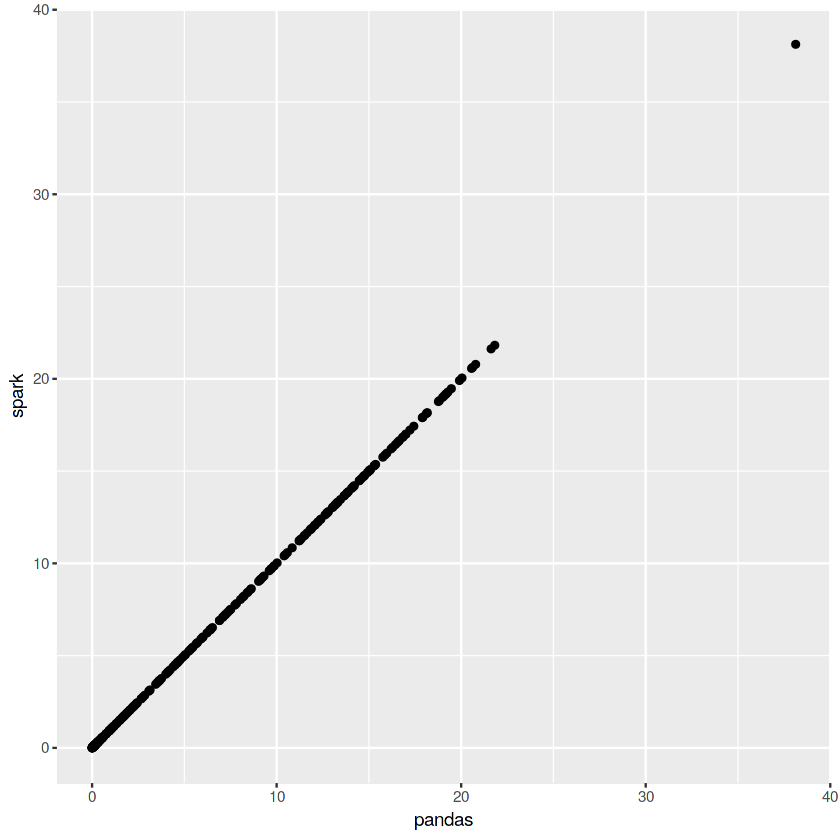

In [18]:
ggplot(data = table, aes(x = pandas, y = spark)) + geom_point()

In [19]:
print(paste("R2:   ", R2_Score(table$spark, table$pandas)))
print(paste("MAE:  ",      MAE(table$spark, table$pandas)))
print(paste("MSE:  ",      MSE(table$spark, table$pandas)))
print(paste("RMSE: ",     RMSE(table$spark, table$pandas)))
print(paste("RAE:  ",      RAE(table$spark, table$pandas)))


[1] "R2:    1"
[1] "MAE:   5.67037145364048e-16"
[1] "MSE:   1.81290538282176e-30"
[1] "RMSE:  1.34644174876664e-15"
[1] "RAE:   1.00237609882984e-16"
